# Importing neccessary libraries

In [2]:
import numpy as np
import pandas as pd
import seaborn as  sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

# Objective

# Overview

# Data Preparation and Cleaning

In [6]:
#Load the dataset into a DataFrame
df = pd.read_csv(r"C:\Users\Saba Ansari\Documents\CSVS\placementdata.csv")

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   StudentID                  10000 non-null  int64  
 1   CGPA                       10000 non-null  float64
 2   Internships                10000 non-null  int64  
 3   Projects                   10000 non-null  int64  
 4   Workshops/Certifications   10000 non-null  int64  
 5   AptitudeTestScore          10000 non-null  int64  
 6   SoftSkillsRating           10000 non-null  float64
 7   ExtracurricularActivities  10000 non-null  object 
 8   PlacementTraining          10000 non-null  object 
 9   SSC_Marks                  10000 non-null  int64  
 10  HSC_Marks                  10000 non-null  int64  
 11  PlacementStatus            10000 non-null  object 
dtypes: float64(2), int64(7), object(3)
memory usage: 937.6+ KB


In [8]:
# Display the first few rows of the dataset
df.head()

,StudentID,CGPA,Internships,Projects,Workshops/Certifications,AptitudeTestScore,SoftSkillsRating,ExtracurricularActivities,PlacementTraining,SSC_Marks,HSC_Marks,PlacementStatus
0,1,7.5,1,1,1,65,4.4,No,No,61,79,NotPlaced
1,2,8.9,0,3,2,90,4.0,Yes,Yes,78,82,Placed
2,3,7.3,1,2,2,82,4.8,Yes,No,79,80,NotPlaced
3,4,7.5,1,1,2,85,4.4,Yes,Yes,81,80,Placed
4,5,8.3,1,2,2,86,4.5,Yes,Yes,74,88,Placed


In [9]:
df.drop("StudentID",axis=1,inplace=True)

In [10]:
# Statistical Description Of The Dataset
df.describe()

,CGPA,Internships,Projects,Workshops/Certifications,AptitudeTestScore,SoftSkillsRating,SSC_Marks,HSC_Marks
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,7.698010,1.049200,2.026600,1.013200,79.449900,4.323960,69.159400,74.501500
std,0.640131,0.665901,0.867968,0.904272,8.159997,0.411622,10.430459,8.919527
min,6.500000,0.000000,0.000000,0.000000,60.000000,3.000000,55.000000,57.000000
25%,7.400000,1.000000,1.000000,0.000000,73.000000,4.000000,59.000000,67.000000
50%,7.700000,1.000000,2.000000,1.000000,80.000000,4.400000,70.000000,73.000000
75%,8.200000,1.000000,3.000000,2.000000,87.000000,4.700000,78.000000,83.000000
max,9.100000,2.000000,3.000000,3.000000,90.000000,4.800000,90.000000,88.000000


In [11]:
# Check for missing values
df.isnull().sum()

CGPA                         0
Internships                  0
Projects                     0
Workshops/Certifications     0
AptitudeTestScore            0
SoftSkillsRating             0
ExtracurricularActivities    0
PlacementTraining            0
SSC_Marks                    0
HSC_Marks                    0
PlacementStatus              0
dtype: int64

The dataset is clean, with no missing values, making it ready for machine learning applications. 

In [13]:
df_cat=df.select_dtypes(object )
df_num=df.select_dtypes([int,float])

In [14]:
from sklearn.preprocessing import LabelEncoder
for i in df_cat:
    le=LabelEncoder()
    df_cat[i]=le.fit_transform(df_cat[i])

In [15]:
df=pd.concat([df_num,df_cat],axis=1)

In [16]:
df.head()

,CGPA,Internships,Projects,Workshops/Certifications,AptitudeTestScore,SoftSkillsRating,SSC_Marks,HSC_Marks,ExtracurricularActivities,PlacementTraining,PlacementStatus
0,7.5,1,1,1,65,4.4,61,79,0,0,0
1,8.9,0,3,2,90,4.0,78,82,1,1,1
2,7.3,1,2,2,82,4.8,79,80,1,0,0
3,7.5,1,1,2,85,4.4,81,80,1,1,1
4,8.3,1,2,2,86,4.5,74,88,1,1,1


In above steps we have label encoded the categorical values into numerical values for better working

# Exploratory Analysis & Visualization

Now that our data is cleaned and ready we will firstly detect outliers in our data by making boxplot.

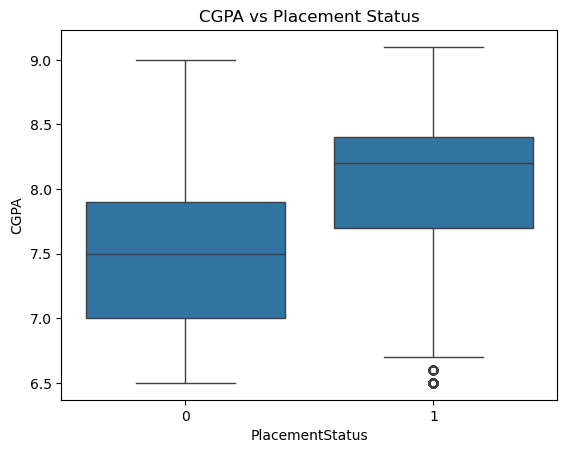

In [20]:
sns.boxplot(x="PlacementStatus",y='CGPA', data=df)
plt.title("CGPA vs Placement Status")
plt.show()

We can clearly see above that higher CGPA increases placement chances, but some low-CGPA students still get placed and A few outliers are present among placed students.

# Correlation Analysis

now we are done with outliers so we will proceed to see correlation between our features and target, which will help us to remove less important features from our model.

so for that we will proceed with heatmap.

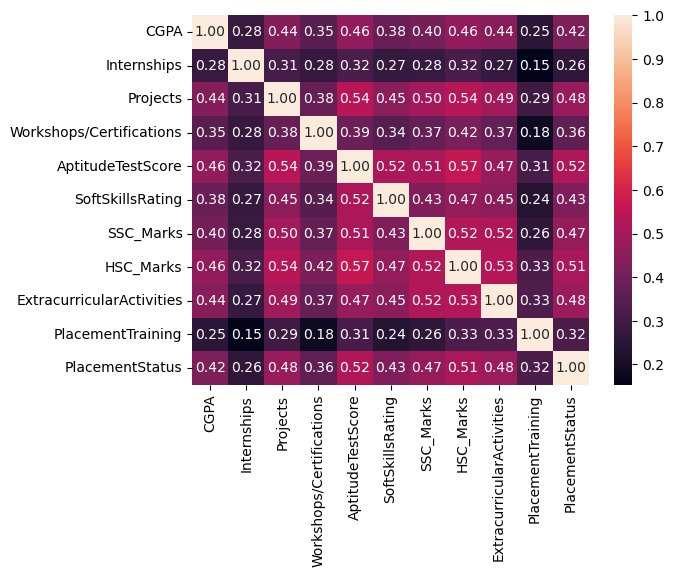

In [25]:
sns.heatmap(df.corr(numeric_only=True),annot=True,fmt=".2f"); plt.show()

Now,as we can see the heatmap shows correlation between numerical values and on that basis we can see that CGPA has a moderate correlation with various factors such as projects, aptitude test scores, and extracurricular activities.Placement status shows a notable correlation with factors like CGPA, placement training, and soft skills rating. Now that we know about correlation of our target with various, it will help us to decide important feature for our model.

# Distribution of Soft Skills Ratings

we are going to see distribution of Soft Skills Ratings through histrogram which will help us to know how Soft Skills Ratings are distributed and detect skewness.

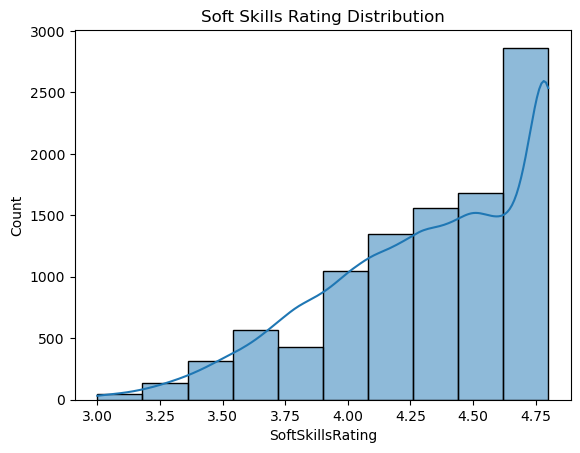

In [29]:
plt.title("Soft Skills Rating Distribution")
sns.histplot(df['SoftSkillsRating'],bins=10,kde=True)
plt.show()

As we can see above, That our histogram is right-skewed which means most candidates have high ratings.

# Distribution of Internships Based on Placement Status

In this step we are going to see the impact of internships on placement status.

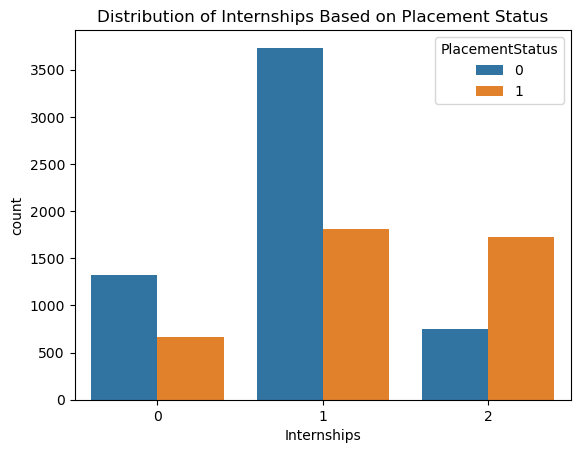

In [33]:
plt.title("Distribution of Internships Based on Placement Status")
sns.countplot(x='Internships', hue="PlacementStatus",data=df)
plt.show()

Here, we can clearly see that more internships generally increase placement chances.

# PlacementStatus by AptitudeTestScore

Further we are going to see how AptitudeTestScore affects the placement

Now,the may arise why only barplot so let's clear it:


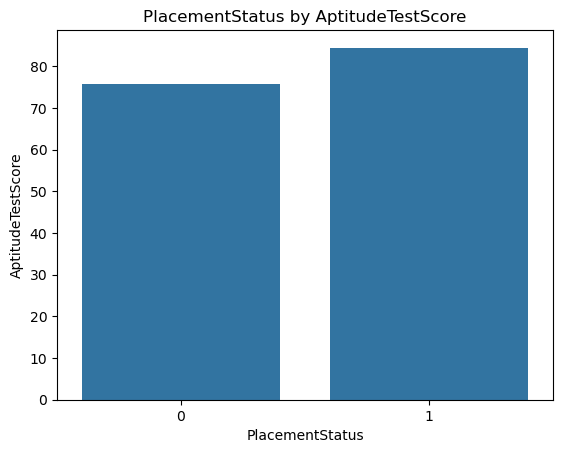

In [38]:
sns.barplot(x=df['PlacementStatus'], y=df["AptitudeTestScore"], data=df,ci=None)
plt.title("PlacementStatus by AptitudeTestScore")
plt.show()

Here, we can see that higher aptitude test scores slightly improve placement chances.

# Distribution of House Furnishing Types

Now,last but not the least we have pie chart representing placementstatus in our dataset.

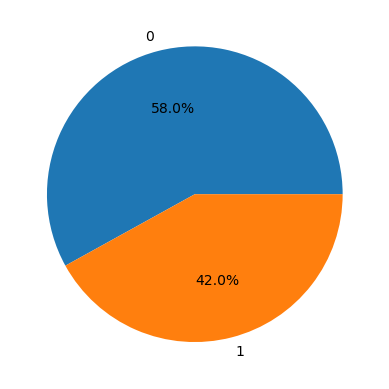

In [42]:
plt.pie(df['PlacementStatus'].value_counts(), labels=df['PlacementStatus'].value_counts().index, autopct='%1.1f%%')
plt.show()

Here we can see the chart shows that 58% of students are not placed, while 42% are placed. This indicates a moderate placement rate, suggesting room for improvement in skills, training, or opportunities.

# Understanding the Data Through Q&A

Below are some key questions and answers to help interpret the insights from our data analysis.

In [46]:
print(f"The average CGPA is {df["CGPA"].mean()}")

The average CGPA is 7.698010000000001


In [47]:
cgpa_by_internships= df.groupby("Internships")["CGPA"].mean()
cgpa_by_internships

Internships
0    7.556228
1    7.583670
2    8.067636
Name: CGPA, dtype: float64

In [48]:
total_students = df["ExtracurricularActivities"].count()
students_with_extracurricular = df["ExtracurricularActivities"].sum()
percentage = (students_with_extracurricular / total_students) * 100
print(f"{percentage:.2f}% of students participated in extracurricular activities.")

58.54% of students participated in extracurricular activities.


In [49]:
aptitude_by_placement = df.groupby("PlacementStatus")["AptitudeTestScore"].mean()
aptitude_by_placement

PlacementStatus
0    75.829399
1    84.455802
Name: AptitudeTestScore, dtype: float64

Above, we can see the average aptitude test score for placed students is more compared to not placed student which clearly indicates that the score affect the placement.

In [51]:
placement_training_effect = df.groupby("PlacementTraining")["PlacementStatus"].value_counts(normalize=True) * 100
placement_training_effect

PlacementTraining  PlacementStatus
0                  0                  84.414616
                   1                  15.585384
1                  1                  51.639792
                   0                  48.360208
Name: proportion, dtype: float64

Placement training improves chances of getting placed (51.64% vs. 15.59%), but it’s not a guarantee. Without training, most (84.41%) remain unplaced.

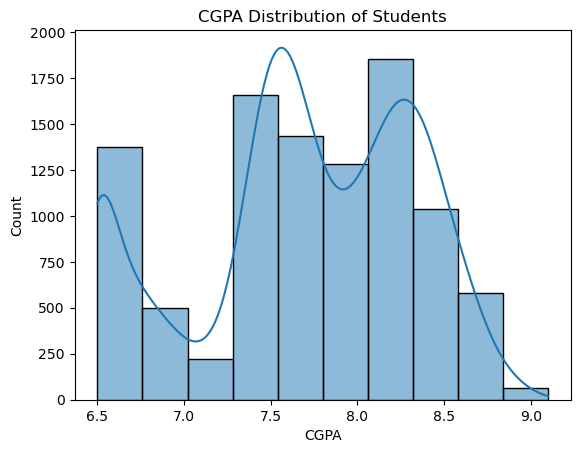

In [53]:
sns.histplot(df["CGPA"], bins=10, kde=True)
plt.title("CGPA Distribution of Students")
plt.xlabel("CGPA")
plt.ylabel("Count")
plt.show()

# Developing the Predictive Model

Now,starting with modelling; firstly we are going to separate our target and features.

In [56]:
#first let's see our first few rows of data
df.head()

,CGPA,Internships,Projects,Workshops/Certifications,AptitudeTestScore,SoftSkillsRating,SSC_Marks,HSC_Marks,ExtracurricularActivities,PlacementTraining,PlacementStatus
0,7.5,1,1,1,65,4.4,61,79,0,0,0
1,8.9,0,3,2,90,4.0,78,82,1,1,1
2,7.3,1,2,2,82,4.8,79,80,1,0,0
3,7.5,1,1,2,85,4.4,81,80,1,1,1
4,8.3,1,2,2,86,4.5,74,88,1,1,1


In [57]:
x=df.iloc[:,:-1]

In [58]:
x

,CGPA,Internships,Projects,Workshops/Certifications,AptitudeTestScore,SoftSkillsRating,SSC_Marks,HSC_Marks,ExtracurricularActivities,PlacementTraining
0,7.5,1,1,1,65,4.4,61,79,0,0
1,8.9,0,3,2,90,4.0,78,82,1,1
2,7.3,1,2,2,82,4.8,79,80,1,0
3,7.5,1,1,2,85,4.4,81,80,1,1
4,8.3,1,2,2,86,4.5,74,88,1,1
...,...,...,...,...,...,...,...,...,...,...
9995,7.5,1,1,2,72,3.9,85,66,1,0
9996,7.4,0,1,0,90,4.8,84,67,0,0
9997,8.4,1,3,0,70,4.8,79,81,1,1
9998,8.9,0,3,2,87,4.8,71,85,1,1


In [59]:
y = df["PlacementStatus"]

In [60]:
y

0       0
1       1
2       0
3       1
4       1
       ..
9995    0
9996    1
9997    1
9998    1
9999    0
Name: PlacementStatus, Length: 10000, dtype: int32

# TrainTestSplit

In [62]:
from sklearn.model_selection import train_test_split

In [63]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.20,random_state=1)

Here, we are done with the separating part so now let's move to make model.

As our target column is classification type we are going to build model with logistic regression for best model.

In [66]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(xtrain,ytrain)
ypred=lr.predict(xtest)

In [67]:
from sklearn.metrics import classification_report
print(classification_report(ypred,ytest))

              precision    recall  f1-score   support

           0       0.77      0.84      0.80      1092
           1       0.78      0.70      0.74       908

    accuracy                           0.78      2000
   macro avg       0.78      0.77      0.77      2000
weighted avg       0.78      0.78      0.77      2000



Here, we have our overall accuracy which is 0.78 which is good and can be considered but we'll try to improve it for best fit model. so, for that we are going to apply solver in our model and then see if there's any improvement.

In [69]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(solver="saga")
lr.fit(xtrain,ytrain)
ypred = lr.predict(xtest)

In [70]:
from sklearn.metrics import classification_report
print(classification_report(ypred,ytest))

              precision    recall  f1-score   support

           0       0.80      0.82      0.81      1156
           1       0.74      0.71      0.73       844

    accuracy                           0.77      2000
   macro avg       0.77      0.77      0.77      2000
weighted avg       0.77      0.77      0.77      2000



so, as we can see saga has not performed well on model and the accuracy is still the same. so,let's try another.

In [72]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(solver="liblinear")
lr.fit(xtrain,ytrain)
ypred = lr.predict(xtest)

In [73]:
from sklearn.metrics import classification_report
print(classification_report(ypred,ytest))

              precision    recall  f1-score   support

           0       0.83      0.85      0.84      1170
           1       0.78      0.76      0.77       830

    accuracy                           0.81      2000
   macro avg       0.80      0.80      0.80      2000
weighted avg       0.81      0.81      0.81      2000



In [74]:
train_accuracy = lr.score(xtrain, ytrain)  
test_accuracy = lr.score(xtest, ytest)  

print(f"Training Accuracy: {train_accuracy:.2f}")
print(f"Testing Accuracy: {test_accuracy:.2f}")

Training Accuracy: 0.79
Testing Accuracy: 0.81


In [75]:
def placement_pred(a,b,c,d,e,f,g,h,i,j):
    features = [[a,b,c,d,e,f,g,h,i,j]]
    yp = lr.predict(features)
    return yp

In [76]:
placement_pred(7.5,1,1,1,65,4.4,61,79,0,0)

array([0])

In [77]:
placement_pred(8.9,0,3,2,90,4.0,78,82,1,1)

array([1])

In [78]:
placement_pred(6.3,0,0,0,62,4.8,49,50,0,0)

array([0])

In [79]:
placement_pred(7.0,0,2,2,71,4.2,55,66,1,0)

array([0])

In [80]:
df.head(3).values

array([[ 7.5,  1. ,  1. ,  1. , 65. ,  4.4, 61. , 79. ,  0. ,  0. ,  0. ],
       [ 8.9,  0. ,  3. ,  2. , 90. ,  4. , 78. , 82. ,  1. ,  1. ,  1. ],
       [ 7.3,  1. ,  2. ,  2. , 82. ,  4.8, 79. , 80. ,  1. ,  0. ,  0. ]])

In [81]:
df.columns

Index(['CGPA', 'Internships', 'Projects', 'Workshops/Certifications',
       'AptitudeTestScore', 'SoftSkillsRating', 'SSC_Marks', 'HSC_Marks',
       'ExtracurricularActivities', 'PlacementTraining', 'PlacementStatus'],
      dtype='object')

In [82]:
inputdata = [[ 7.5,  1. ,  1. ,  1. , 65. ,  4.4, 61. , 79. ,  0. ,  0.],
             [ 8.9,  0. ,  3. ,  2. , 90. ,  4. , 78. , 82. ,  1. ,  1.],
             [ 7.3,  1. ,  2. ,  2. , 82. ,  4.8, 79. , 80. ,  1. ,  0.]]

In [83]:
newdf = pd.DataFrame(data=inputdata,columns=['CGPA', 'Internships', 'Projects', 'Workshops/Certifications',
       'AptitudeTestScore', 'SoftSkillsRating', 'SSC_Marks', 'HSC_Marks',
       'ExtracurricularActivities', 'PlacementTraining'])

In [84]:
newdf

,CGPA,Internships,Projects,Workshops/Certifications,AptitudeTestScore,SoftSkillsRating,SSC_Marks,HSC_Marks,ExtracurricularActivities,PlacementTraining
0,7.5,1.0,1.0,1.0,65.0,4.4,61.0,79.0,0.0,0.0
1,8.9,0.0,3.0,2.0,90.0,4.0,78.0,82.0,1.0,1.0
2,7.3,1.0,2.0,2.0,82.0,4.8,79.0,80.0,1.0,0.0


In [143]:
lr.predict(newdf)[0]

0

In [145]:
import pickle

In [147]:
pickle.dump(lr,open("logmodel.pkl","wb"))